# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)

In [6]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [7]:
apple = apple.set_index("Date")
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [8]:
dup = apple[apple.index.duplicated]
if len(dup) != 0:
    print("Yes, there are duplicate dates.")
else:
    print("No, there are no duplicate dates.")

No, there are no duplicate dates.


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
apple = apple.sort_values(by="Date", ascending=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [10]:
apple_month = apple.resample("BM").mean()
apple_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
diff = apple.index.max() - apple.index.min() 
diff.days

12261

### Step 11.  How many months in the data we have?

In [12]:
apple_month = apple.resample("BM").mean()
len(apple_month.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

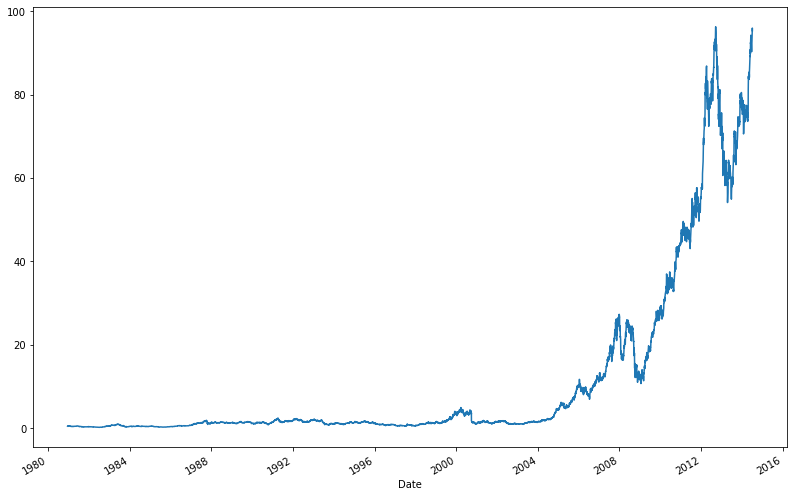

In [13]:
data = apple['Adj Close'].plot()
fig = data.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

### Plot the total 'volume' of Apple Stock being traded each day. Set the size of the figure to 13.5 x 9 inches

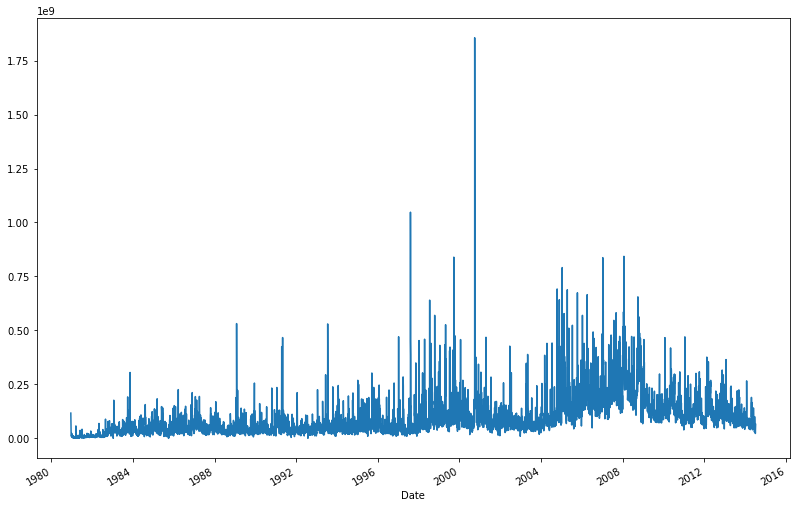

In [14]:
data2 = apple['Volume'].plot()
fig = data2.get_figure()
fig.set_size_inches(13.5, 9)

### Plot the price-earnings ratio each day. Set the size of the figure to 13.5 x 9 inches

In [15]:
apple['Price_lag_1'] = apple['Adj Close'].shift(-1)
apple['Price_diff_1'] = apple['Price_lag_1'] - apple['Adj Close']
apple['Daily_return'] = apple['Price_diff_1'] / apple['Adj Close']
apple['Updown'] = [1 if apple['Daily_return'].loc[Date] > 0 else 0 for Date in apple.index]

apple_chart = apple[['Adj Close','Price_lag_1','Price_diff_1','Daily_return','Updown']]
apple_chart.head()

,Adj Close,Price_lag_1,Price_diff_1,Daily_return,Updown
Date,,,,,
1980-12-12,0.45,0.42,-0.03,-0.066667,0
1980-12-15,0.42,0.39,-0.03,-0.071429,0
1980-12-16,0.39,0.40,0.01,0.025641,1
1980-12-17,0.40,0.41,0.01,0.025000,1
1980-12-18,0.41,0.44,0.03,0.073171,1


In [16]:
apple['Updown'].value_counts() #주가 상승일(1), 하락일(0)의 수

0    4744
1    3721
Name: Updown, dtype: int64

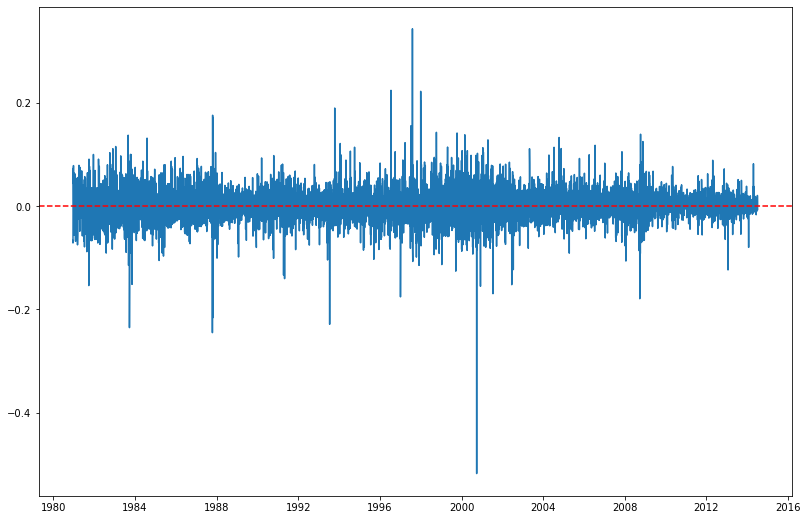

In [17]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple.index, apple['Daily_return'])
plt.axhline(y=0, color='red', ls='--')
plt.show() #일일 주가 수익률 그래프